# Linear Regression 

Linear regression is a statistical method used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). The basic idea of linear regression is to find the straight line that best fits the data points in a scatter plot.

The most common form of linear regression is simple linear regression, which models the relationship between two variables:

$y = \beta_1 x + \beta_0$

where y is the dependent variable, x is the independent variable, $\beta_1$ is the slope, and $\beta_0$ is the intercept. 

Given a set of input data ($\{x_i, y_i\}$), the goal of linear regression is to find the values of $\beta_1$ and $\beta_0$ that best fit the data


The values of $\beta_1$ and $\beta_0$ are chosen to minimize the "sum of squared errors" (SSE) $(\sum (y - \hat{y})^2)$.

Taking the partial derivatives with respect to $\beta_1$ and $\beta_0$, set them equal to 0, and solve for $\beta_1$ and $\beta_0$, we get:
 

$ \beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$ \beta_0 = \bar{y} - \beta_1 \cdot \bar{x} $


Multiple linear regression is a more general form of linear regression that models the relationship between multiple independent variables and one dependent variable. The formula for the best-fit hyperplane in multiple linear regression is:

$y = w_0 + w_1.x_1 + w_2.x_2 + ... + w_n.x_n = X^T. W$

Check this [link](https://nandeshwar.in/100-days-of-deep-learning/what-is-linear-regression-with-derivation/) for the whole derivative process.

## Code

### 1. Simple linear regression
Here is a basic implementation of simple linear regression in Python using the least squares method:

In [8]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.beta_1 = None # slope
        self.beta_0 = None # intercept
    
    def fit(self, X, y):
        n = len(X)
        x_mean = np.mean(X)
        y_mean = np.mean(y)
        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (X[i]-x_mean) * (y[i] - y_mean)
            denominator += (X[i]-x_mean) ** 2
        self.beta_1 = numerator / denominator
        self.beta_0 = y_mean - self.beta_1 * x_mean
    
    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.beta_1 * x + self.beta_0)
        return y_pred

In [11]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegression()
lr.fit(X, y)
print(lr.beta_1)  # Output: 0.6
print(lr.beta_0)  # Output: 2.2
y_pred = lr.predict(X)
print(y_pred)  # Output: [2.8, 3.4, 4.0, 4.6, 5.2]

0.6
2.2
[2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]


### 2. Vectorized
$y = X.W$

$W = (X^T.X)^{-1}X^T.y$

Check [this link](https://courses.cs.washington.edu/courses/cse446/20wi/Lecture8/08_Regularization.pdf) for derivative.

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        '''
        X: n x d
        '''
        # add bias term to X -> [1 X]
        n = X.shape[0]
        X = np.hstack([np.ones((n,1)), X])
        self.W = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        n = X.shape[0]
        X = np.hstack([np.ones((n,1)), X])
        return X @ self.W

In [4]:
X = np.array([[2, 2], [4, 5], [7, 8]])
n = X.shape[0]
X = np.hstack([np.ones((n,1)), X])
X

array([[1., 2., 2.],
       [1., 4., 5.],
       [1., 7., 8.]])

In [6]:
# Create example input data
X = np.array([[2, 2], [4, 5], [7, 8]])
y = np.array([9, 17, 26])

# Fit linear regression model
lr = LinearRegression()
lr.fit(X, y)
print(lr.W) # [3. 1. 2.] # 3 is beta_0

# Make predictions on new data
X_new = np.array([[10, 11], [13, 14]])
y_pred = lr.predict(X_new)
print(y_pred)  # Output: [35. 44.]

[3. 1. 2.]
[35. 44.]


### 3. Improvements
here are some improvements to the simple linear regression implementation to make it more robust:

1. Add input **validation**: Add input validation to check that the input arrays X and y have the same length and are not empty.

2. Use NumPy broadcasting: Instead of looping through the data to calculate the numerator and denominator, we can use NumPy broadcasting to perform the calculations in a vectorized way. This will make the code faster and more efficient.

3. Add **regularization**: Regularization can help prevent overfitting by adding a penalty term to the cost function. One common regularization technique is L2 regularization, which adds the sum of squares of the coefficients to the cost function. This can be easily added to the code by adding a regularization parameter to the constructor.

4. Use **gradient descent**: For large datasets, calculating the inverse of the matrix in the normal equation can be computationally expensive (ON^3). To overcome this, we can use gradient descent to minimize the cost function. This can be implemented by adding a method that updates the coefficients iteratively using the gradient descent algorithm.

Here's the updated code that incorporates these improvements:

In [18]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, regul=0):
        self.regul = regul
        self.W = None
    
    def fit(self, X, y, lr=0.01, num_iter=1000):
        # Input validation
        if len(X) != len(y) or len(X) == 0:
            raise ValueError("X and y must have the same length and cannot be empty")
        
        # Add bias term to X -> [1 X]
        X = np.hstack([np.ones((len(X), 1)), X])
        
        # Initialize W to zeros
        self.W = np.zeros(X.shape[1])
        
        # Use gradient descent to minimize cost function
        for i in range(num_iter):
            # calculate predicted values
            y_pred = np.dot(X, self.W)
            # calculate cost function
            cost = np.sum((y_pred - y)**2) + self.regul * np.sum(self.W ** 2)
            # calculate gradients
            gradients = 2 * np.dot(X.T, (y_pred - y)) + 2 * self.regul * self.W
            # update W
            self.W = self.W - lr * gradients
            
            if i%1000 == 0: print(cost)
    
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        y_pred = np.dot(X, self.W)
        return y_pred

In [19]:
X = np.array([[1, 2, 3, 4, 5]]).T
y = np.array([2, 4, 5, 4, 5])
lr = LinearRegressionGD(regul=0.1)
lr.fit(X, y, lr=0.01, num_iter=10000)
print(lr.W)  # Output: [ 1.99964292  0.65345474 ]
y_pred = lr.predict(X)
print(y_pred)  # # Output: [2.65309766, 3.3065524, 3.96000714, 4.61346188, 5.26691662]



86.0
2.879128727013035
2.879128727013033
2.879128727013033
2.879128727013033
2.879128727013033
2.879128727013033
2.879128727013033
2.879128727013033
2.879128727013033
[1.99964292 0.65345474]
[2.65309766 3.3065524  3.96000714 4.61346188 5.26691662]


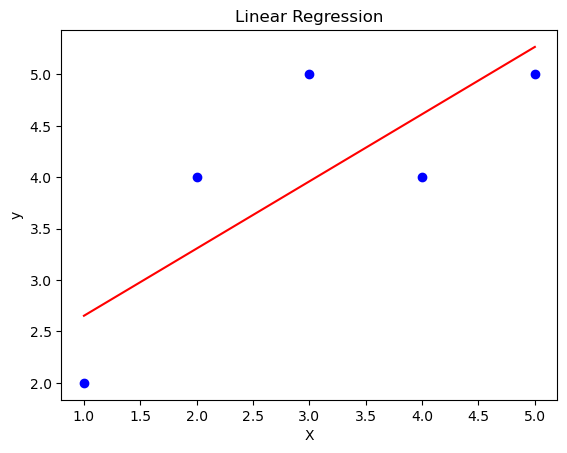

In [20]:

import matplotlib.pyplot as plt 

# Plot the data and the linear regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

